In [1]:
import pandas as pd
import numpy as np
from openpyxl import load_workbook

import matplotlib.pyplot as plt

In [2]:
col_label_dict = {'B': 'min_temp',
                 'C': 'max_temp',
                 'D': 'avg_temp',
                 'E': 'avg_humidity',
                 'F': 'rainfall',
                 'G': 'sunshine',
                 'H': 'air_max_speed',
                 'I': 'air_max_dir',
                 'J': 'avg_air_speed',
                 'K': 'air_dir'
                 }

# Load Excel Data

In [3]:
def get_col_values(df, col_label, ws):
    for label in col_label:
        r_start = label+str(10)
        r_end = label+str(9+df.index.size)
        col_range = ws[r_start:r_end]
    
        val = np.empty([0,0])
        for columns in col_range:
            for item in columns:
                val = np.append(val, item.value)
    
        df[col_label_dict[label]] = val
    return df

In [4]:
def load_xl_data(file_name):
    wb = load_workbook('data_cuaca/'+file_name)
    ws = wb.active
    
    start_date = pd.to_datetime(ws['A10'].value, format='%d-%m-%Y')
    if(start_date.month < 12):
        next_month = start_date.month + 1
        next_year = start_date.year
    else:
        next_month = 1
        next_year = start_date.year + 1
    end_date = pd.to_datetime('01-'+str(next_month)+'-'+str(next_year), format='%d-%m-%Y')
    days = pd.date_range(start=start_date, end=end_date, freq='D')
    days = days[:-1]

    
    df = pd.DataFrame(data=days,columns=["date"])
    df.set_index('date', inplace=True)
    
    df = get_col_values(df, ['B','C', 'D', 'E', 'F', 'G'], ws=ws)
    
    return df

# Get data from All Excel File

In [5]:
file_num = 75

In [6]:
def get_xl_data(iteration):
    df = pd.DataFrame()
    for i in np.arange(start=0, stop=iteration):
        file_name = 'laporan_iklim_harian ('+str(i)+').xlsx'
        if (df.size == 0):
            df = load_xl_data(file_name)
        else:
            df = pd.concat([df, load_xl_data(file_name)])
    return df

In [7]:
df = get_xl_data(file_num)
df.head()

,min_temp,max_temp,avg_temp,avg_humidity,rainfall,sunshine
date,,,,,,
2016-01-01,19.0,27.6,24.1,85.0,None,4.1
2016-01-02,20.0,28.0,23.2,89.0,8888,8.6
2016-01-03,21.0,27.9,23.7,84.0,None,8.4
2016-01-04,20.0,27.4,22.5,89.0,9,3.3
2016-01-05,18.0,27.0,21.4,93.0,34.5,3.5


In [8]:
df.tail()

,min_temp,max_temp,avg_temp,avg_humidity,rainfall,sunshine
date,,,,,,
2022-03-27,18.6,28.5,23.1,88.0,8888.0,3.3
2022-03-28,20.9,28.8,24.2,84.0,0.0,7.6
2022-03-29,21.6,27.0,22.0,93.0,0.0,6.2
2022-03-30,18.2,26.8,22.3,90.0,36.7,2.5
2022-03-31,18.0,28.2,22.4,87.0,0.0,3.5


df.to_csv('iklim_sulut.csv')

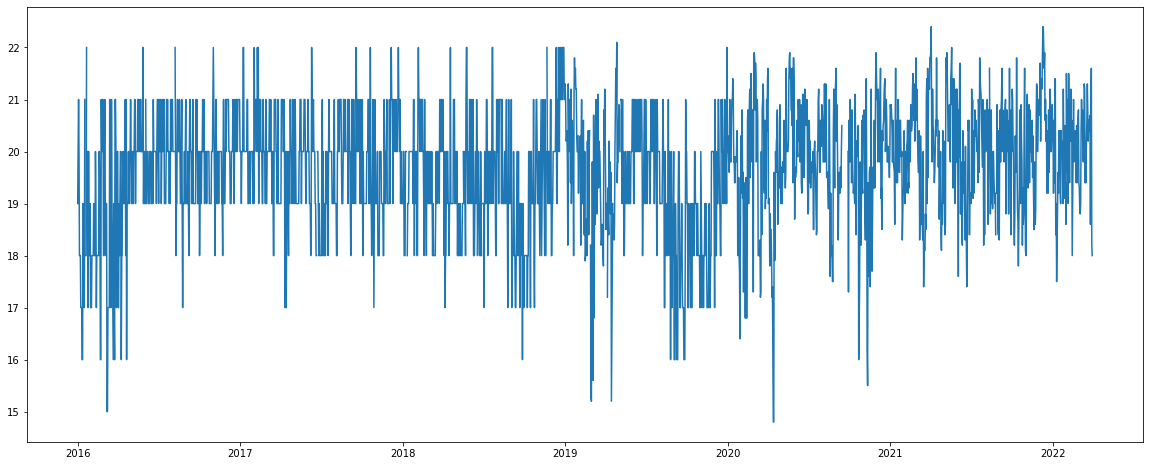

In [9]:
plt.figure(figsize=(20,8))
plt.plot(df.min_temp)

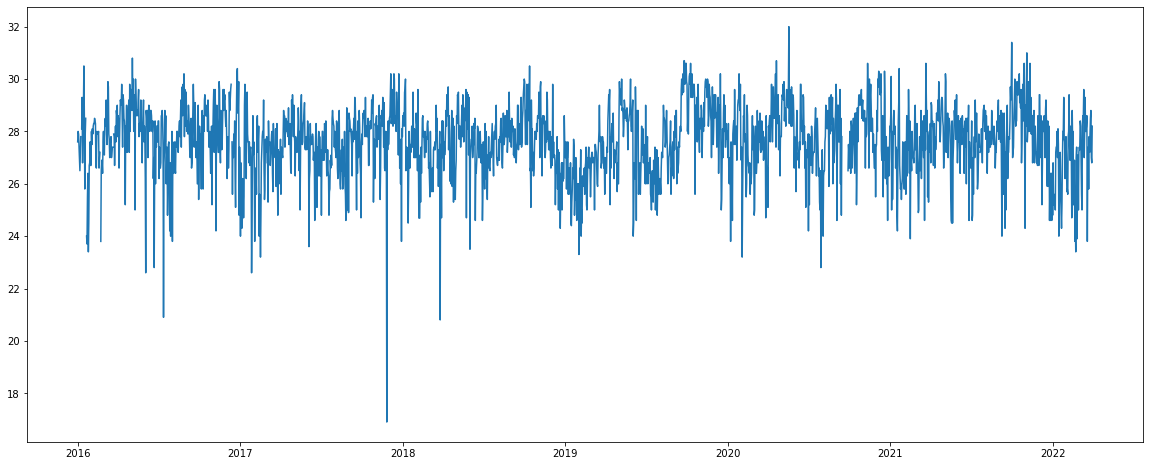

In [10]:
plt.figure(figsize=(20,8))
plt.plot(df.max_temp)

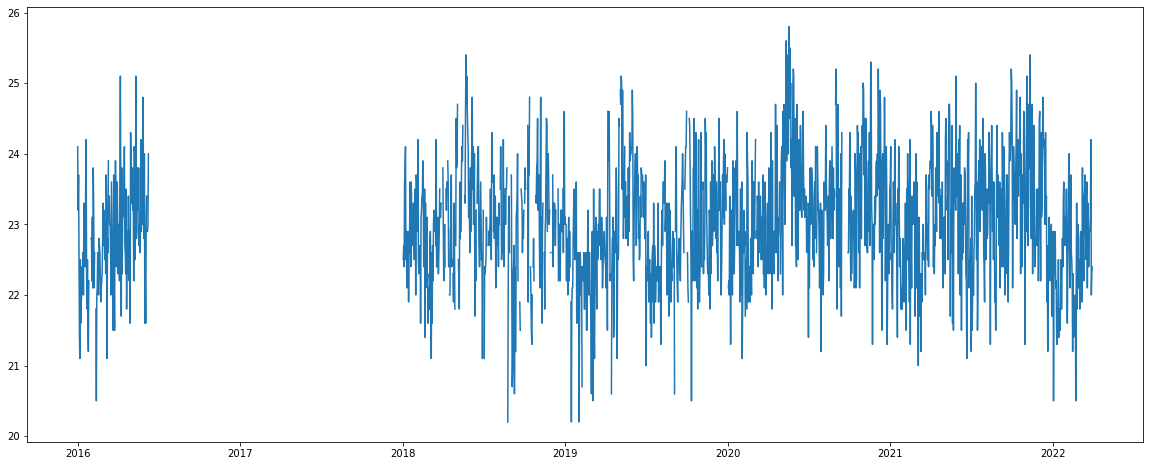

In [11]:
plt.figure(figsize=(20,8))
plt.plot(df.avg_temp)

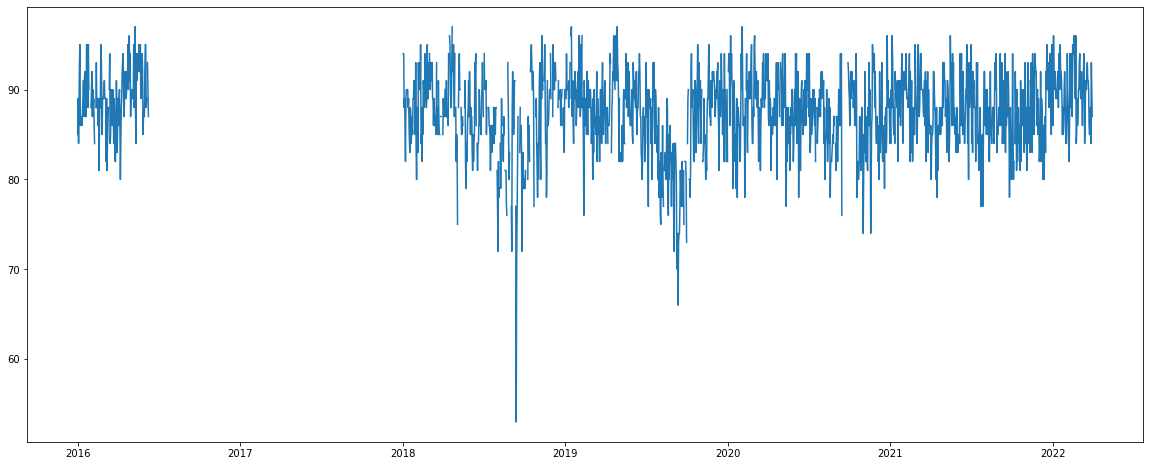

In [12]:
plt.figure(figsize=(20,8))
plt.plot(df.avg_humidity)

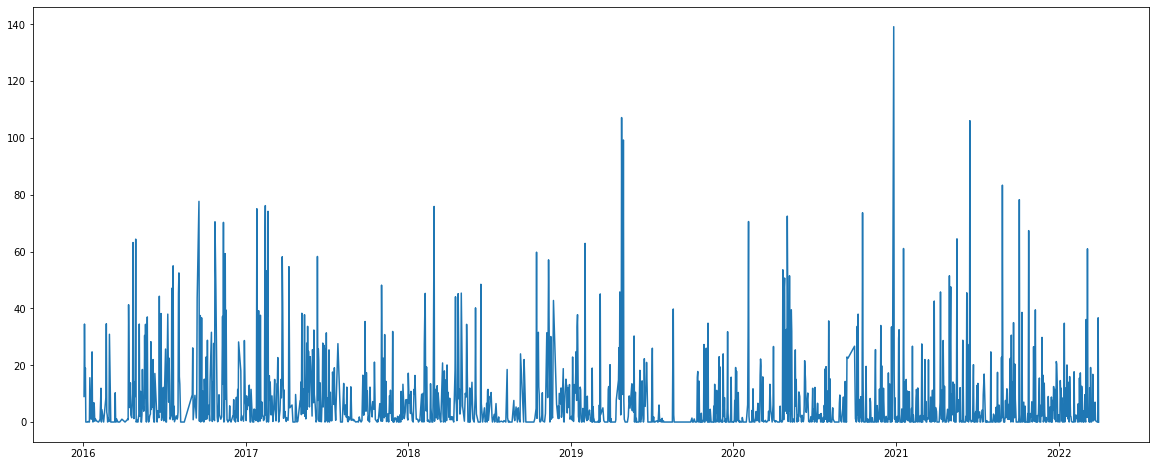

In [13]:
plt.figure(figsize=(20,8))
plt.plot(df.rainfall[df.rainfall < 800])

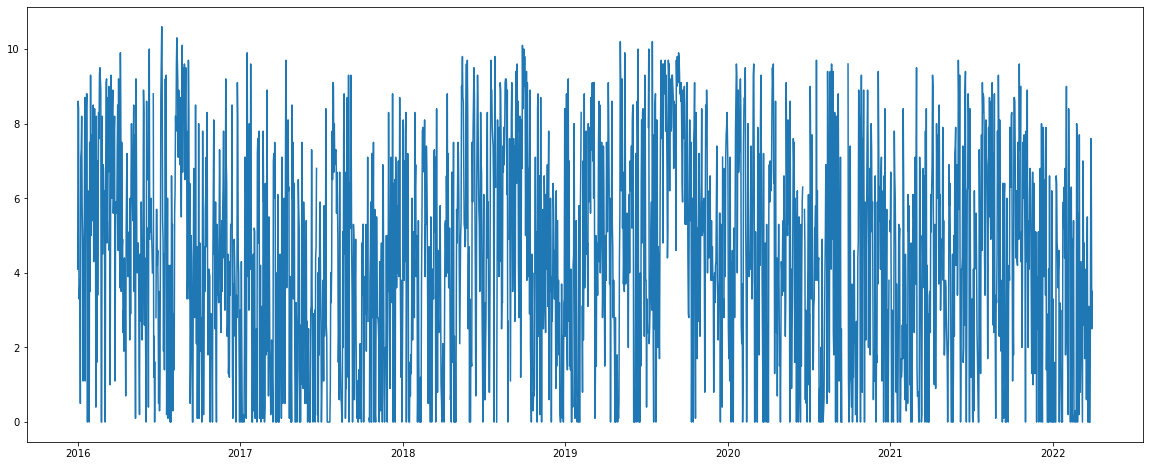

In [14]:
plt.figure(figsize=(20,8))
plt.plot(df.sunshine)